<center><h1>Decision Tree Pipeline Optimization on Imbalanced Data</h1>
    <h2>Rebecca Hinrichs</h2>
    <h3>Data Mining</h3>
    <h4>7 Oct 2022</h4></center>

***

Using Python's 'Decision Tree' machine learning algorithm, we will explore the database `S1_Originaldata.csv` containing data collected from cancer patients fighting glioblastoma. We will implement parameter optimization techniques in order to help us achieve as high of an accuracy reading as possible, and will discuss our findings.

***

## *** Exploratory Data Analysis ***

In [2]:
# Import libraries & dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Load the data
data = pd.read_csv('S1_Originaldata.csv')
print('\nOur data set contains', data.shape[0], 'rows and', data.shape[1], 'columns.')
print('\nThe names of our', data.shape[1], 'variables (features) are:')
[print(i) for i in data.columns[:10]]


Our data set contains 444 rows and 16384 columns.

The names of our 16384 variables (features) are:
class
1/2-SBSRNA4
A1BG
A1BG-AS1
A1CF
A2LD1
A2M
A2ML1
A2MP1
A4GALT


[None, None, None, None, None, None, None, None, None, None]

It appears we have one unique variable at the beginning of our features list, `class`, and the rest appear to follow a pattern of serial identifiers. By counting the number of non-`class` rows we have in total, we should have the total number of columns - 1 = `len(pd.unique(data.columns)) - 1` = $16383$, and the name of our last column should be a serial identifier.

In [4]:
print('\nThe name of the last variable in our data set is', data.columns[-1])
print('\nTherefore we have one column identifying', data.columns[0], 'and', \
      len(pd.unique(data.columns))-1 ,'individual genomic patterns (features).\n')


The name of the last variable in our data set is PPP1R3D

Therefore we have one column identifying class and 16383 individual genomic patterns (features).



In [5]:
# Summarizing the Data
print('\nWe can get a snapshot of the first 5 rows of the data available using head().')
print('From this small sample we can estimate how each feature was recorded.')
data.head()


We can get a snapshot of the first 5 rows of the data available using head().
From this small sample we can estimate how each feature was recorded.


,class,1/2-SBSRNA4,A1BG,A1BG-AS1,A1CF,A2LD1,A2M,A2ML1,A2MP1,A4GALT,...,PPP1R2P3,PPP1R2P9,PPP1R32,PPP1R35,PPP1R36,PPP1R37,PPP1R3A,PPP1R3B,PPP1R3C,PPP1R3D
0,Neoplastic_Core,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0,...,0.000000,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
1,Neoplastic_Core,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0,...,1.487372,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
2,Neoplastic_Core,0.0,0.0,0.0,0.0,0.0,3.812781,0.0,0.0,0,...,0.000000,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
3,Neoplastic_Core,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0,...,0.000000,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
4,Neoplastic_Core,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0,...,0.000000,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0


We observe that the the classes are represented by strings, and our features appear to be positive-valued floats, and include a large number of $0.0$ values. We'll check first for any $N/A$ values then explore the nature of the $0.0$ values.

In [6]:
# Looking for missing (NaN) values
print('\nWe can find missing values by using .isna() and .sum() in conjunction on our Pandas dataframe.')
print('\nThe total number of cells containing missing (NaN) values in our data set is', data.isna().sum().sum(),'\n')


We can find missing values by using .isna() and .sum() in conjunction on our Pandas dataframe.

The total number of cells containing missing (NaN) values in our data set is 0 



In [7]:
# Looking for zero values
num_zeros = np.count_nonzero(data==0)
print('\nThe total number of cells containing zero values in our data set is', num_zeros,'\n')
print('The percentage of zero values of our entire data set is ', \
      round((num_zeros / (data.shape[0] * data.shape[1]) * 100),2), '% percent.\n', sep='')


The total number of cells containing zero values in our data set is 6520229 

The percentage of zero values of our entire data set is 89.63% percent.



In [16]:
type(data['A1CF'].values[0])

numpy.float64

In [422]:
# Locating zero-valued data in the variables
data_zeroes = (data==0).sum()
print('\nThe following columns contain at least ten percent of their records as zero values:')
print(data_zeroes[(data_zeroes/(len(data)) >= .1)])
print('\nThis list contains', len(data_zeroes[(data_zeroes/(len(data)) >= .1)]), \
      'columns, and the largest column contains', data_zeroes.nlargest()[0], 'zeroes.')
print('\nRecall that the total number of records collected is', len(data), 'records, which means\n' \
     '\tthere is at least one feature containing all zeroes.\n')
five_number = [0, 10, 25, 50, 75, 90, 100]
for i in five_number:
    print('The total number of features ' \
     f'containing {i}%+ of their values in zeroes is', \
      len(data_zeroes[(data_zeroes/(len(data)) >= i/100)]), 'or', \
      round(len(data_zeroes[(data_zeroes/(len(data)) >= i/100)]) / data.shape[1] * 100,2), '% percent.')
print('\nOnly', \
     len(data_zeroes[(data_zeroes/(len(data)) < .1)]), \
    'zero values exist among variables which contain less than 10% of their data as zeroes.\n')


The following columns contain at least ten percent of their records as zero values:
1/2-SBSRNA4    426
A1BG           335
A1BG-AS1       425
A1CF           441
A2LD1          430
              ... 
PPP1R37        436
PPP1R3A        444
PPP1R3B        418
PPP1R3C        408
PPP1R3D        434
Length: 16358, dtype: int64

This list contains 16358 columns, and the largest column contains 444 zeroes.

Recall that the total number of records collected is 444 records, which means
	there is at least one feature containing all zeroes.

The total number of features containing 0%+ of their values in zeroes is 16384 or 100.0 % percent.
The total number of features containing 10%+ of their values in zeroes is 16358 or 99.84 % percent.
The total number of features containing 25%+ of their values in zeroes is 16263 or 99.26 % percent.
The total number of features containing 50%+ of their values in zeroes is 15840 or 96.68 % percent.
The total number of features containing 75%+ of their values in ze

A large percentage- $89.63\%$ of all of our data values are $0.0$ in value. Additionally, nearly all of our features- $99.84\%$ contain over $10\%$ of their values in terms of $0.0$. In fact, over half of all of our features contain at least $90\%$ of their values in terms of $0.0$. Finally, we see a significant number of features- $20.78\%$ of them- to be composed entirely of $0.0$ values.
<br><br>
It would be imperative at this point for us to consult with our client / data collector regarding the implications of these zeroes. Are these measurements to be included in our analysis, or should they be discarded as irrelevant? The significance would be sizeable on our statistical analysis.

In [423]:
# Evaluate label assignment distribution of records
data_class_dist = data.groupby('class').size()
print('\nThe number of records per class assignment is as follows:')
data_class_dist
# data['class'].value_counts()  # <-- another way to do this


The number of records per class assignment is as follows:


class
Neoplastic_Core         386
Neoplastic_Periphery     58
dtype: int64

(array([0, 1]),
 [Text(0, 0, 'Neoplastic_Core'), Text(1, 0, 'Neoplastic_Periphery')])

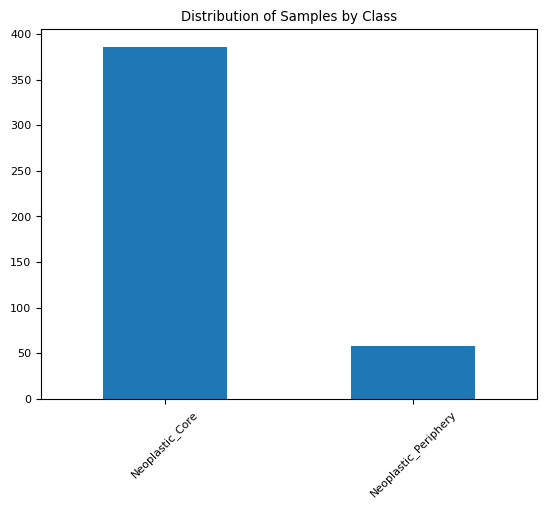

In [424]:
# Demonstrate frequency of labels as a histogram
data['class'].value_counts().plot(kind='bar', title='Distribution of Samples by Class')
plt.xticks(rotation=45)

In [425]:
# Confirm label distribution among record totals
print('\nGiven these counts, we observe an uneven distribution among a total of', \
      len(data_class_dist), 'classes,\n\tfrom', \
      min(data_class_dist), 'to', \
      max(data_class_dist), 'records apiece.\n')
print('The total class assignment of ', \
      data['class'].count(), ' is equivalent to our record total of ', \
      data.shape[0], '.\n', sep='')
print('Among the classes, label `', np.unique(data['class'])[0], '` accounts for ', \
      len(data[data['class'].values==np.unique(data['class'])[0]]), ' or ', \
      round((data['class'].value_counts()[0] / data.shape[0]) * 100,2), \
      '% percent of our record total',',', sep='')
print('\tand label `', np.unique(data['class'])[1], '` accounts for ', \
      len(data[data['class'].values==np.unique(data['class'])[1]]), ' or ', \
      round((data['class'].value_counts()[1] / data.shape[0]) * 100,2), \
      '% percent of our record total','.\n', sep='')


Given these counts, we observe an uneven distribution among a total of 2 classes,
	from 58 to 386 records apiece.

The total class assignment of 444 is equivalent to our record total of 444.

Among the classes, label `Neoplastic_Core` accounts for 386 or 86.94% percent of our record total,
	and label `Neoplastic_Periphery` accounts for 58 or 13.06% percent of our record total.



Rows, Columns: (444, 16384)
Class Distribution among Variables:


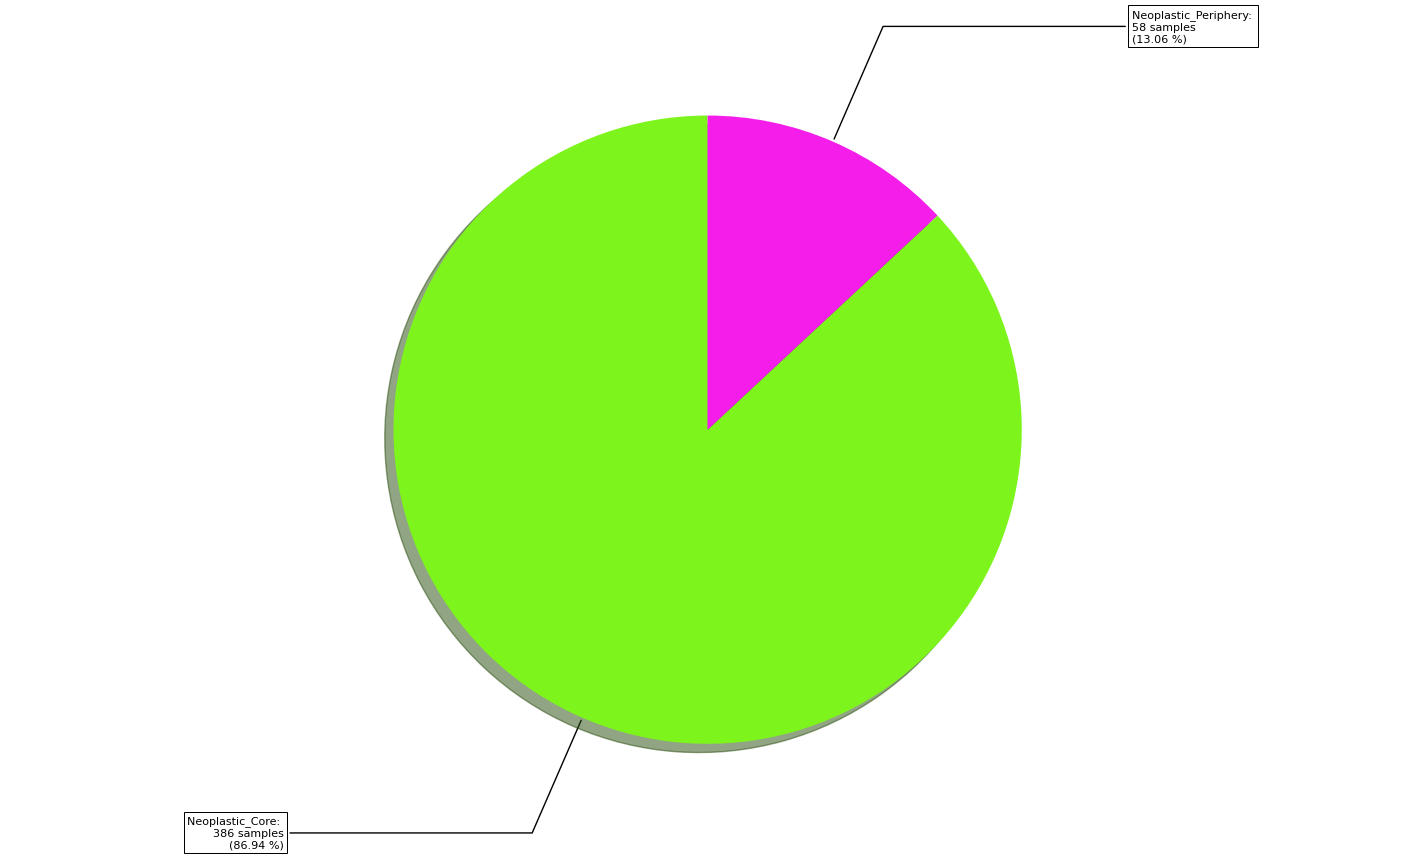

In [426]:
# Evaluate class distribution among entire dataset as a pie chart
print("Rows, Columns:", data.shape)
print('Class Distribution among Variables:')
Classes = data.groupby('class').size()
labels = Classes.index.values
sizes = Classes.values
label_list = []
for k in range(0,labels.size):
  text = labels[k]+': \n'+str(sizes[k])+' samples\n({:,.2f} %)'.format((100*sizes[k]/sum(sizes)))
  label_list.append(text)
colors = ['#7df51d','#f51de9']
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),bbox=bbox_props, zorder=0, va="center")
fig,ax1 = plt.subplots(figsize=(18,9),ncols=1,nrows=1)
wedges, texts = ax1.pie(sizes, shadow=True, colors=colors, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax1.annotate(label_list[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)
plt.show()

In [427]:
# Internal Use Only
data_copy = data.copy()
# data = data_copy.copy()
data.shape

(444, 16384)

### *** Data Preparation ***

In [428]:
# Import libraries & dependencies
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold

In [429]:
# Store class variable assignments and reassign dummy variables
data_classes = data['class'].values
print(data_classes.shape, 'indicates every row has been stored.')
np.unique(data_classes)

(444,) indicates every row has been stored.


array(['Neoplastic_Core', 'Neoplastic_Periphery'], dtype=object)

In [430]:
# Replace string values in dataset with dummy reference Labels
data['class'] = data['class'].replace(np.unique(data['class']),[0,1])
data.head()

,class,1/2-SBSRNA4,A1BG,A1BG-AS1,A1CF,A2LD1,A2M,A2ML1,A2MP1,A4GALT,...,PPP1R2P3,PPP1R2P9,PPP1R32,PPP1R35,PPP1R36,PPP1R37,PPP1R3A,PPP1R3B,PPP1R3C,PPP1R3D
0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0,...,0.000000,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0,...,1.487372,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,3.812781,0.0,0.0,0,...,0.000000,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0,...,0.000000,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
4,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0,...,0.000000,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0


In [431]:
# Confirm dummy variable counts equate to original label counts
data.groupby('class').size()

class
0    386
1     58
dtype: int64

We will not solve the class imbalance problem in this report. However by observing this distribution, we confirm that the majority of our class variables are heaviest around the `0` dummy variable and lightest around the `1` dummy variable, indicating:
  - `Neoplastic_Core` == `0`<br>
  - `Neoplastic_Periphery` == `1`

In [432]:
# Comparing statistics
print('\nWe can now get a summarized statistics report of each feature using describe().')
print('From this summary we can witness the numerical differences between the variables.')
data.describe()


We can now get a summarized statistics report of each feature using describe().
From this summary we can witness the numerical differences between the variables.


,class,1/2-SBSRNA4,A1BG,A1BG-AS1,A1CF,A2LD1,A2M,A2ML1,A2MP1,A4GALT,...,PPP1R2P3,PPP1R2P9,PPP1R32,PPP1R35,PPP1R36,PPP1R37,PPP1R3A,PPP1R3B,PPP1R3C,PPP1R3D
count,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.0,...,444.000000,444.0,444.000000,444.000000,444.000000,444.000000,444.0,444.000000,444.000000,444.000000
mean,0.130631,0.281286,1.300646,0.218221,0.043053,0.169951,0.966699,0.308724,0.034910,0.0,...,0.129347,0.0,0.186652,1.500870,0.168991,0.059058,0.0,0.274012,0.578264,0.138385
std,0.337376,1.448833,2.474125,1.103586,0.567969,1.023480,2.856530,1.524655,0.468207,0.0,...,0.482201,0.0,1.083458,2.676177,1.034354,0.502183,0.0,1.252474,2.071382,0.950394
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,2.762115,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
max,1.000000,9.515390,9.235368,8.587576,8.715006,9.315997,14.432504,9.786054,7.939351,0.0,...,3.053072,0.0,8.149755,10.759567,8.607547,7.653209,0.0,10.029919,11.223894,9.566267


In [433]:
print('\nThe maximum data point recorded is', data[1:].values.max())
print('The minimum data point recorded is', data[1:].values.min())
print('The average of all data points is', data[1:].values.mean(),'\n')


The maximum data point recorded is 17.0520795
The minimum data point recorded is 0.0
The average of all data points is 0.7036449314561052 



In [434]:
# Checkpoint
data_copy = data.copy()
data_copy.shape

(444, 16384)

#### *** Parametrization ***

In [435]:
# Define dependent (Y) and independent (X) variables to prepare for our model F where F(X)=Y
print('\nWe\'ll start by assigning our X and Y values to begin modeling our data.\n')
y = data['class'].values
X = data.drop('class', axis=1)
print(f'`X` contains all of the data values as a {X.shape[0]} by {X.shape[1]} data frame.')
print(f'`y` contains the class labels for each record as a {y.shape[0]} list of values.')


We'll start by assigning our X and Y values to begin modeling our data.

`X` contains all of the data values as a 444 by 16383 data frame.
`y` contains the class labels for each record as a 444 list of values.


In [436]:
# Checkpoint
X_copy = X.copy()
y_copy = y.copy()
data.shape

(444, 16384)

#### *** Scaling ***

In [437]:
# Before testing, we'll scale our (x) training inputs in order to ensure uniform evaluation
X_cols = list(X.columns)
scaler = StandardScaler().fit(X)
scaled_data = scaler.transform(X)
X = pd.DataFrame(scaled_data, columns=X_cols)

# We can use .head() to confirm the scaling was effective
X.head()

,1/2-SBSRNA4,A1BG,A1BG-AS1,A1CF,A2LD1,A2M,A2ML1,A2MP1,A4GALT,A4GNT,...,PPP1R2P3,PPP1R2P9,PPP1R32,PPP1R35,PPP1R36,PPP1R37,PPP1R3A,PPP1R3B,PPP1R3C,PPP1R3D
0,-0.194366,-0.526292,-0.197961,-0.075887,-0.166239,-0.338799,-0.202716,-0.074645,0.0,-0.056664,...,-0.268545,0.0,-0.172468,-0.561459,-0.163563,-0.117734,0.0,-0.219024,-0.279483,-0.145773
1,-0.194366,-0.526292,-0.197961,-0.075887,-0.166239,-0.338799,-0.202716,-0.074645,0.0,-0.056664,...,2.819484,0.0,-0.172468,-0.561459,-0.163563,-0.117734,0.0,-0.219024,-0.279483,-0.145773
2,-0.194366,-0.526292,-0.197961,-0.075887,-0.166239,0.997466,-0.202716,-0.074645,0.0,-0.056664,...,-0.268545,0.0,-0.172468,-0.561459,-0.163563,-0.117734,0.0,-0.219024,-0.279483,-0.145773
3,-0.194366,-0.526292,-0.197961,-0.075887,-0.166239,-0.338799,-0.202716,-0.074645,0.0,-0.056664,...,-0.268545,0.0,-0.172468,-0.561459,-0.163563,-0.117734,0.0,-0.219024,-0.279483,-0.145773
4,-0.194366,-0.526292,-0.197961,-0.075887,-0.166239,-0.338799,-0.202716,-0.074645,0.0,-0.056664,...,-0.268545,0.0,-0.172468,-0.561459,-0.163563,-0.117734,0.0,-0.219024,-0.279483,-0.145773


In [438]:
# Checkpoint
X_copy = X.copy()
y_copy = y.copy()

#### *** Collinearity ***

In [439]:
# Pre-processing variables to check for collinearity
var_threshold = VarianceThreshold(threshold = 0)
var_threshold.fit(X)
X_cols = X.columns[var_threshold.get_support()]
X = var_threshold.transform(X)
X = pd.DataFrame(X, columns = X_cols)
print('\nPassing nonzero data frame with shape:', X.shape)

# Define threshold of collinearity to be at least 90-percent
threshold = 0.9

# Detect correlation between variables using correlation matrix
corr_matrix = X.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))
upper.head()


Passing nonzero data frame with shape: (444, 12979)


,1/2-SBSRNA4,A1BG,A1BG-AS1,A1CF,A2LD1,A2M,A2ML1,A2MP1,A4GNT,AAA1,...,PPP1R21,PPP1R26,PPP1R2P3,PPP1R32,PPP1R35,PPP1R36,PPP1R37,PPP1R3B,PPP1R3C,PPP1R3D
1/2-SBSRNA4,NaN,0.03853,0.038477,0.212732,0.010663,0.012245,0.003359,0.014508,0.011013,0.021492,...,0.049195,0.039944,0.026016,0.033522,0.014681,0.031791,0.022883,0.042571,0.132006,0.106635
A1BG,NaN,NaN,0.174402,0.097982,0.048801,0.001524,0.037141,0.008413,0.002064,0.058194,...,0.031629,0.016862,0.060943,0.054722,0.037630,0.015373,0.010022,0.039938,0.017211,0.006436
A1BG-AS1,NaN,NaN,NaN,0.205036,0.140532,0.053619,0.012866,0.061849,0.011217,0.021889,...,0.011795,0.000111,0.053161,0.102706,0.080205,0.099294,0.063005,0.032889,0.018279,0.028857
A1CF,NaN,NaN,NaN,NaN,0.012615,0.025710,0.015383,0.005665,0.004300,0.008391,...,0.019207,0.015595,0.020379,0.013088,0.050926,0.012412,0.008934,0.008677,0.021209,0.011062
A2LD1,NaN,NaN,NaN,NaN,NaN,0.089207,0.013736,0.077223,0.009420,0.018382,...,0.025792,0.037520,0.044643,0.028671,0.023715,0.027191,0.019572,0.024881,0.046461,0.024233


In [440]:
# Select columns which have correlations above specified threshold
cols_to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
print('\nThere are %d collinear columns to remove.\n' % (len(cols_to_drop)))


There are 1437 collinear columns to remove.



In [441]:
# Remove collinear columns from dataset
X = X.drop(cols_to_drop, axis=1)
print(X.shape)

(444, 11542)


In [442]:
# Checkpoint
X_copy = X.copy()
y_copy = y.copy()

***

## *** Machine Learning ***

In [443]:
# Import libraries & dependencies
from sklearn.model_selection import train_test_split
# from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# from sklearn.tree import export_graphviz
# from IPython.display import Image
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import accuracy_score, log_loss, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
import time
import seaborn as sns
# suppress version deprication warnings
import warnings
warnings.filterwarnings('ignore')

In [444]:
# Build the model using 20% of the data set for testing, 80% for training
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,     # test size of 20% (rest:train)
                                                    random_state=101,  # random state = 101
                                                    stratify=y)        # distribute shuffling
# Summary of Model Parameters
print('\nWe will train our model to predict the Class to which each record belongs based on its features.')
print()
print('Our training model has', X_train.shape[0], 'rows x', X_train.shape[1], 'columns ' \
     'representing data points collected.\n' \
      'These make a total of', X_train.shape[0]*X_train.shape[1],'independent (x) inputs to our model,\n' \
      'delivering', y_train.shape[0], 'dependent (y) linear outputs from some function F(x)=y.')
print('Our training model hosts',round((X_train.shape[0]/data.shape[0]*100),2), '% of the data.')
print()
print('Our testing model has', X_test.shape[0], 'rows x', X_test.shape[1], 'columns ' \
     'representing data points collected.\n' \
      'These make a total of', X_test.shape[0]*X_test.shape[1],'independent (x) inputs to our model,\n' \
      'delivering', y_test.shape[0], 'dependent (y) linear outputs from proposed function F(x)=y.')
print('Our testing model hosts',round((X_test.shape[0]/data.shape[0]*100),2), '% of the data.\n')


We will train our model to predict the Class to which each record belongs based on its features.

Our training model has 355 rows x 11542 columns representing data points collected.
These make a total of 4097410 independent (x) inputs to our model,
delivering 355 dependent (y) linear outputs from some function F(x)=y.
Our training model hosts 79.95 % of the data.

Our testing model has 89 rows x 11542 columns representing data points collected.
These make a total of 1027238 independent (x) inputs to our model,
delivering 89 dependent (y) linear outputs from proposed function F(x)=y.
Our testing model hosts 20.05 % of the data.



In [445]:
# Observe percentage of label distribution per training / testing samples
print(f'Total samples in dataset: {len(data)}\n')
unique, frequency = np.unique(y_train, return_counts = True)
print(f'Class distribution for {len(y_train)} training samples:')
print(f'Class\tCount\tPercent')
for u, f in zip(unique, frequency):
    print(f'{u:>5}\t{f:>5}\t{f/frequency.sum():.1%}')
print()
unique, frequency = np.unique(y_test, return_counts = True)
print(f'Class distribution for {len(y_test)} testing samples:')
print(f'Class\tCount\tPercent')
for u, f in zip(unique, frequency):
    print(f'{u:>5}\t{f:>5}\t{f/frequency.sum():.1%}')

Total samples in dataset: 444

Class distribution for 355 training samples:
Class	Count	Percent
    0	  309	87.0%
    1	   46	13.0%

Class distribution for 89 testing samples:
Class	Count	Percent
    0	   77	86.5%
    1	   12	13.5%


#### *** k Nearest Neighbors ***

In [447]:
# kNN Parametrization Configuration
k = 21    # an odd number roughly equal to the square root of the training data length
knn = KNeighborsClassifier(n_neighbors=k,       # number of predicted neighbors / classifiers
                           weights='distance',  # density is determined by distance btwn points
                           metric='manhattan',  # manhattan distance
                           algorithm='auto',    # allow model to decide best algorithm from .fit
                           ).fit(X_train, y_train)
y_pred = knn.predict(X_test)
# Confusion Matrix
print(confusion_matrix(y_test, y_pred))
# Classification Report
print(classification_report(y_test, y_pred))
# Accuracy report
print('\nAccuracy is', round((100*accuracy_score(y_test,y_pred)),2), '% percent.')

[[77  0]
 [12  0]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        77
           1       0.00      0.00      0.00        12

    accuracy                           0.87        89
   macro avg       0.43      0.50      0.46        89
weighted avg       0.75      0.87      0.80        89


Accuracy is 86.52 % percent.


Text(0, 0.5, 'Mean Error')

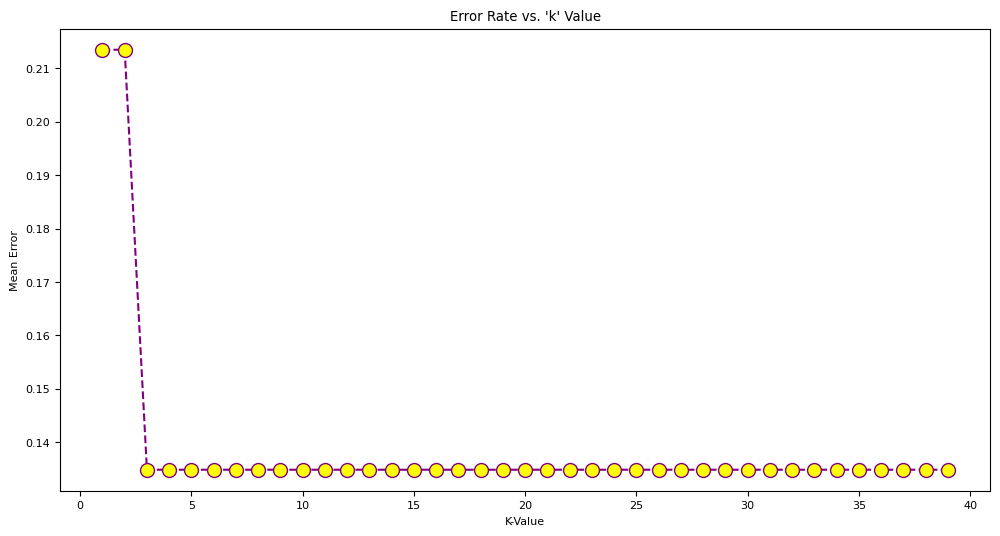

In [448]:
# Reducing Error Rate: Optimizing 'k'
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i,    # number of predicted neighbors / classifiers
                           weights='distance',   # density is determined by distance btwn points
                           metric='manhattan',   # manhattan distance
                           algorithm='auto',     # allow model to decide best algorithm from .fit
                           ).fit(X_train, y_train)
    y_pred_i = knn.predict(X_test)
    error_rate.append(np.mean(y_pred_i != y_test))
# Determine the best k-value by plotting the Error Rate according to each k-Value Tested
plt.figure(figsize = (12,6))
plt.plot(range(1,40), error_rate, color='purple', linestyle='dashed', marker='o', 
         markerfacecolor='yellow', markersize=10)
plt.title('Error Rate vs. \'k\' Value')
plt.xlabel('K-Value')
plt.ylabel('Mean Error')

In [449]:
# Now we'll find the k-values where the minimum error rate occurs & compare the outputs
find_min = pd.DataFrame(X_test, error_rate)
mins = np.where(error_rate == min(error_rate))
poss_k = list(mins[0])
print('\nThis algorithm says', poss_k, 'are the best k-Values.\n')


This algorithm says [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38] are the best k-Values.



In [450]:
# Finally, we'll compare the Classification Report & Confusion Matrix for each 'k' proposal
for i in poss_k:
    if i != 0:  # We cannot have no neighbors
        # Determine best k-value
        knn = KNeighborsClassifier(n_neighbors=i,       # number of predicted neighbors / classifiers
                                   weights='distance',  # density is determined by distance btwn points
                                   metric='manhattan',  # manhattan distance
                                   algorithm='auto',    # allow model to decide best algorithm from .fit
                                   ).fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        print('\n<<--------------------------------------------------------->>')
        print(f'\tFor k = {i} we have the following report:\n')
        # Confusion matrix
        print(confusion_matrix(y_test,y_pred))
        print()
        # Classification report
        print(classification_report(y_test,y_pred))
        # Accuracy report
        print('\nAccuracy is', round((100*accuracy_score(y_test,y_pred)),2), '% percent.')


<<--------------------------------------------------------->>
	For k = 2 we have the following report:

[[67 10]
 [ 9  3]]

              precision    recall  f1-score   support

           0       0.88      0.87      0.88        77
           1       0.23      0.25      0.24        12

    accuracy                           0.79        89
   macro avg       0.56      0.56      0.56        89
weighted avg       0.79      0.79      0.79        89


Accuracy is 78.65 % percent.

<<--------------------------------------------------------->>
	For k = 3 we have the following report:

[[77  0]
 [12  0]]

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        77
           1       0.00      0.00      0.00        12

    accuracy                           0.87        89
   macro avg       0.43      0.50      0.46        89
weighted avg       0.75      0.87      0.80        89


Accuracy is 86.52 % percent.

<<---------------------------------


<<--------------------------------------------------------->>
	For k = 19 we have the following report:

[[77  0]
 [12  0]]

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        77
           1       0.00      0.00      0.00        12

    accuracy                           0.87        89
   macro avg       0.43      0.50      0.46        89
weighted avg       0.75      0.87      0.80        89


Accuracy is 86.52 % percent.

<<--------------------------------------------------------->>
	For k = 20 we have the following report:

[[77  0]
 [12  0]]

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        77
           1       0.00      0.00      0.00        12

    accuracy                           0.87        89
   macro avg       0.43      0.50      0.46        89
weighted avg       0.75      0.87      0.80        89


Accuracy is 86.52 % percent.

<<-------------------------------


<<--------------------------------------------------------->>
	For k = 36 we have the following report:

[[77  0]
 [12  0]]

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        77
           1       0.00      0.00      0.00        12

    accuracy                           0.87        89
   macro avg       0.43      0.50      0.46        89
weighted avg       0.75      0.87      0.80        89


Accuracy is 86.52 % percent.

<<--------------------------------------------------------->>
	For k = 37 we have the following report:

[[77  0]
 [12  0]]

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        77
           1       0.00      0.00      0.00        12

    accuracy                           0.87        89
   macro avg       0.43      0.50      0.46        89
weighted avg       0.75      0.87      0.80        89


Accuracy is 86.52 % percent.

<<-------------------------------

In [451]:
# Checkpoint
X = X_copy.copy()
y = y_copy.copy()
# Build the model using 20% of the data set for testing, 80% for training
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,     # test size of 20% (rest:train)
                                                    random_state=101,  # random state = 101
                                                    stratify=y)        # distribute shuffling

### *** Decision Tree Classification Model ***

In [452]:
# Functions to for Decision Tree Model Performance using Baseline & Optimization Parameters
def show_grid_results(model):
    print(f'We trained {len(model.cv_results_["params"])} models using grid search and chose the best one:\n')
    for i, d in enumerate(model.cv_results_['params']):
        if i-1 == model.best_index_:
            print()
        for k, v in d.items():
            print(f'{k}: {str(v):6}{" "*6}', end='')
        print(f'{model.cv_results_["mean_test_score"][i]:.8f}', end = '')
        print(f'{"  <-- BEST PERFORMANCE" if i == model.best_index_ else ""}')
        if i+1 == model.best_index_:
            print()
def show_confusion_matrix(model, X_test, y_test):
    class_names = model.classes_
    fig, ax = plt.subplots(figsize=(5, 5), dpi=100)
    ax.grid = False
    plt.rcParams.update({'font.size': 8})
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=None,
                                 ax=ax)
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45, ha='right')
    disp.ax_.set_title(f'Confusion Matrix\n{model}', size=11, y=1.05)
    ax.tick_params(axis='both', which='major', labelsize=10)
    plt.show();
def plot_decision_tree(clf, feature_names, class_names):
    export_graphviz(clf, out_file="tree_temp.dot", feature_names=feature_names, class_names=class_names, filled = True, impurity = False)
    with open("tree_temp.dot") as f:
        dot_graph = f.read()
    return graphviz.Source(dot_graph)
def fit_and_predict_model(model, X_train, y_train, X_test):
    start_time = time.time()
    print('Training model ...', end='')
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    eval_time = start_time - start_time
    print(f'training completed in {train_time:.4f}s.')
    if type(model) == 'sklearn.model_selection._search.GridSearchCV':
        print('Making predictions with model on test data ... ', end='')
        y_pred = model.best_estimator_.predict(X_test)
        print('predictions completed.')
    else:
        print('Making predictions with model on test data ... ', end='')
        y_pred = model.predict(X_test)
        print('predictions completed.')
    return y_pred, train_time, eval_time
# Global variable to hold all results
results = []
# Update results for a model
def capture_results(model_description, y_test, y_pred, train_time, eval_time):
    r = (model_description,
         accuracy_score(y_test, y_pred),
         precision_score(y_test, y_pred, average='weighted'),
         recall_score(y_test, y_pred, average='weighted'),
         f1_score(y_test, y_pred, average='weighted'))
    results.append(r)

The decision tree has 19 nodes with maximum depth 5.

Model Accuracy: 1.0
Training model ...training completed in 0.2912s.
Making predictions with model on test data ... predictions completed.
[[75  2]
 [ 2 10]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        77
           1       0.83      0.83      0.83        12

    accuracy                           0.96        89
   macro avg       0.90      0.90      0.90        89
weighted avg       0.96      0.96      0.96        89


Accuracy is 95.51 % percent.


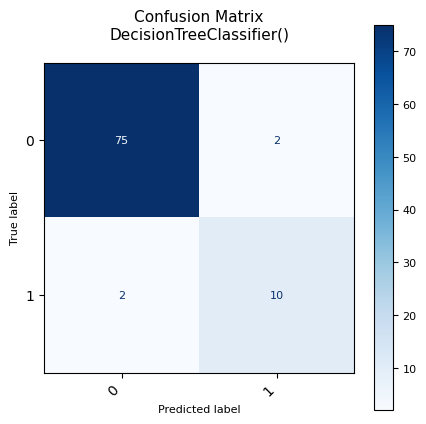

In [453]:
# Configure Decision Tree Classification Model
tree = DecisionTreeClassifier().fit(X_train, y_train)

# Summary of Decision Tree Configuration
print(f'The decision tree has {tree.tree_.node_count} nodes ' \
      f'with maximum depth {tree.tree_.max_depth}.\n')
print(f'Model Accuracy: {round(tree.score(X_train, y_train),2)}')

# Prediction Report
y_pred, train_time, eval_time = fit_and_predict_model(tree, X_train, y_train, X_test)
capture_results('Decision Tree - Baseline', y_test, y_pred, train_time, eval_time)
# Confusion Matrix
print(confusion_matrix(y_test, y_pred))
# Classification Report
print(classification_report(y_test, y_pred))
# Accuracy report
print('\nAccuracy is', round((100*accuracy_score(y_test,y_pred)),2), '% percent.')
show_confusion_matrix(tree, X_test, y_test)

In [454]:
# Optimize Decision Tree Model using model parameters
tree = DecisionTreeClassifier(random_state = 0,
                              max_depth = 13
                              ).fit(X_train, y_train)

# Optimization Hyperparameters using GridSearchCV()
param_grid = {'max_depth': [2, 3, 4, 5, 6, 7], 
              'min_samples_leaf': [2, 20, 50,70], 
              'max_leaf_nodes': [5, 9, 15, 21, 27]}
gs_dt = GridSearchCV(DecisionTreeClassifier(), 
                     param_grid, 
                     cv=4, 
                     n_jobs=-1
                     ).fit(X_train, y_train)
tree_opt = gs_dt.best_estimator_

# Summary of Optimized Decision Tree Configuration Findings
print(f'The best model is: \n{tree_opt} with a score of {gs_dt.best_score_} \n')
print('The results are as follows:')
show_grid_results(gs_dt)

The best model is: 
DecisionTreeClassifier(max_depth=3, max_leaf_nodes=9, min_samples_leaf=2) with a score of 0.9154111338100102 

The results are as follows:
We trained 120 models using grid search and chose the best one:

max_depth: 2           max_leaf_nodes: 5           min_samples_leaf: 2           0.90972932
max_depth: 2           max_leaf_nodes: 5           min_samples_leaf: 20          0.91257022
max_depth: 2           max_leaf_nodes: 5           min_samples_leaf: 50          0.85351762
max_depth: 2           max_leaf_nodes: 5           min_samples_leaf: 70          0.87043539
max_depth: 2           max_leaf_nodes: 9           min_samples_leaf: 2           0.90972932
max_depth: 2           max_leaf_nodes: 9           min_samples_leaf: 20          0.91257022
max_depth: 2           max_leaf_nodes: 9           min_samples_leaf: 50          0.85351762
max_depth: 2           max_leaf_nodes: 9           min_samples_leaf: 70          0.87043539
max_depth: 2           max_leaf_nodes: 1

The decision tree has 13 nodes with maximum depth 3.

Model Accuracy: 0.99
Training model ...training completed in 0.2124s.
Making predictions with model on test data ... predictions completed.
[[77  0]
 [ 3  9]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        77
           1       1.00      0.75      0.86        12

    accuracy                           0.97        89
   macro avg       0.98      0.88      0.92        89
weighted avg       0.97      0.97      0.96        89


Accuracy is 96.63 % percent.


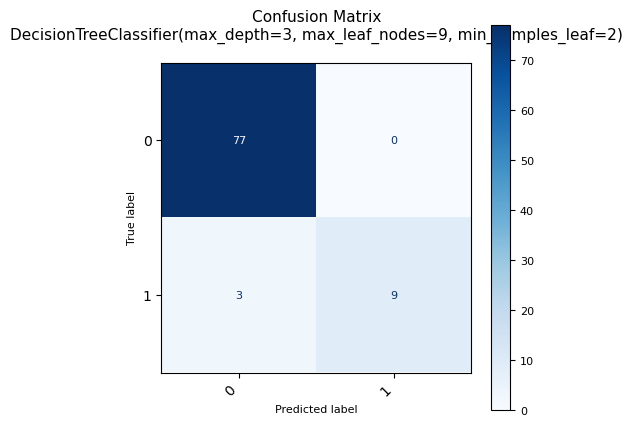

In [455]:
# Summary of Optimized Decision Tree Configuration Findings cont'd
print(f'The decision tree has {tree_opt.tree_.node_count} nodes ' \
      f'with maximum depth {tree_opt.tree_.max_depth}.\n')
print(f'Model Accuracy: {round(tree_opt.score(X_train, y_train),2)}')

# Optimized Prediction Report
y_pred, train_time, eval_time = fit_and_predict_model(tree_opt, X_train, y_train, X_test)
capture_results('Decision Tree - Baseline', y_test, y_pred, train_time, eval_time)
# Confusion Matrix
print(confusion_matrix(y_test, y_pred))
# Classification Report
print(classification_report(y_test, y_pred))
# Accuracy report
print('\nAccuracy is', round((100*accuracy_score(y_test,y_pred)),2), '% percent.')
show_confusion_matrix(tree_opt, X_test, y_test)

***

## *** Conclusion ***

We evaluated the data and performed a Decision Tree Classification algorithm on our data set and found our optimized model to perform the best with a $94.38\%$ overall accuracy rate.
<br><br>
Dr. Guillen-Rondon- I know you did not ask for us to do the KNN Classification as well but I was curious to see how it compared for this particular data set and compared to the DT Classifier. I was impressed to find that the KNN Classifier gave its most optimized accuracy at $86.52\%$ and we were still able to achieve this $96.63\%$ accuracy using the DT Classifier with heavily imbalanced data, and a super impressive $100\%$ accuracy using the DT Classifier with balanced data in HW4!

***